# Data Understanding

We will make use of the datasets from Zindi, which is the largest professional network for data scientists in Africa.In particular we will be focusing on  3 different datasets for both train and test.

> a) Demographic data
* customerid(primary key)
* birthdate (date of birth of the customer)
* bank_account_type (type of primary bank account)
* latitude_gps / longitude_gps
* bank_name_clients (name of the bank)
* bank_branch_clients(location of the branch)
* employment_status_clients
* level_of_education_clients (highest level of education)

> b) Perfomance data
* customerid(primary key)
* systemloanid(id associated with the particular loan)
* loannumber(number of loan we are predicting)
* approveddate(date loan was approved)
* loan amount
* totaldue
* termdays
* refferedby
* good_bad_flag(good = settled loan on time; bad = did not settled loan on time)

> c) Previous loans data
* customerid
* systemloanid
* loannumber(the number of the loan that we will predict)
* approveddate
* creationdate(date the loan was created)
* loanamount
* totaldue
* closeddate
* refferedby
* firstduedate
* firstpaiddate


## Importing Libraries

In [30]:
# Basic data manipultion and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import os
print(os.getcwd())


c:\Users\Derrick Masungo\Desktop\Loan-Default-Prediction


In [5]:
# Loading the datasets
train_demographics = pd.read_csv("c:/Users/Derrick Masungo/Desktop/Loan-Default-Prediction/data/traindemographics.csv")
train_perf = pd.read_csv("c:/Users/Derrick Masungo/Desktop/Loan-Default-Prediction/data/trainperf.csv")
train_prev_loans = pd.read_csv("c:/Users/Derrick Masungo/Desktop/Loan-Default-Prediction/data/trainprevloans.csv")
test_demographics = pd.read_csv("c:/Users/Derrick Masungo/Desktop/Loan-Default-Prediction/data/testdemographics.csv")
test_perf = pd.read_csv("c:/Users/Derrick Masungo/Desktop/Loan-Default-Prediction/data/testperf.csv")
test_prev_loans = pd.read_csv("c:/Users/Derrick Masungo/Desktop/Loan-Default-Prediction/data/testprevloans.csv")


In [6]:
#viewing the dataset info
train_prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [7]:
#describing the dataset
test_prev_loans.describe(include='all')

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
count,5907,5.907000e+03,5907.000000,5907,5907,5907.000000,5907.000000,5907.000000,5907,325,5907,5907
unique,1442,NaN,NaN,5905,5903,NaN,NaN,NaN,5886,176,356,5887
top,8a858ff554e290e10154fe4e6b3f648c,NaN,NaN,2017-05-24 18:00:34.000000,2017-06-15 20:19:25.000000,NaN,NaN,NaN,2017-06-09 01:18:23.000000,8a858f5a57519e48015774cfff892e8d,2017-07-03 00:00:00.000000,2017-06-13 00:00:00.000000
freq,33,NaN,NaN,2,2,NaN,NaN,NaN,2,7,126,4
mean,NaN,3.018374e+08,4.194176,NaN,NaN,16271.711529,19334.173421,26.762316,NaN,NaN,NaN,NaN
std,NaN,9.552391e+04,3.406739,NaN,NaN,9280.598734,10369.677671,10.593658,NaN,NaN,NaN,NaN
min,NaN,3.016001e+08,1.000000,NaN,NaN,1000.000000,1112.500000,15.000000,NaN,NaN,NaN,NaN
25%,NaN,3.017736e+08,2.000000,NaN,NaN,10000.000000,11500.000000,15.000000,NaN,NaN,NaN,NaN
50%,NaN,3.018547e+08,3.000000,NaN,NaN,10000.000000,13000.000000,30.000000,NaN,NaN,NaN,NaN
75%,NaN,3.019191e+08,6.000000,NaN,NaN,20000.000000,24500.000000,30.000000,NaN,NaN,NaN,NaN


In [8]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858f9f5679951a01567a5b90644817,1983-12-16 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [9]:
train_demographics.describe(include='all')

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4346,4346,4346,4346.000000,4346.000000,4346,51,3698,587
unique,4334,3297,3,NaN,NaN,18,45,6,4
top,8a858f9f5679951a01567a5b90644817,1983-12-16 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate
freq,2,5,3425,NaN,NaN,1598,3,3146,420
mean,NaN,NaN,NaN,4.626189,7.251356,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,7.184832,3.055052,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-118.247009,-33.868818,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.470610,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.593302,6.621888,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.545220,7.425052,NaN,NaN,NaN,NaN


In [10]:
train_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [11]:
test_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerid    1450 non-null   object 
 1   systemloanid  1450 non-null   int64  
 2   loannumber    1450 non-null   int64  
 3   approveddate  1450 non-null   object 
 4   creationdate  1450 non-null   object 
 5   loanamount    1450 non-null   int64  
 6   totaldue      1450 non-null   float64
 7   termdays      1450 non-null   int64  
 8   referredby    184 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 102.1+ KB


### Merging the train data

In [12]:
#checking the shapes of the train data
print (train_demographics.shape)
print (train_perf. shape)
print (train_prev_loans.shape)

(4346, 9)
(4368, 10)
(18183, 12)


#### The `trainperf` and `train_prev_loans` have same columns names. The columns names are renamed by adding `.perf` and `.prev`

In [13]:
columns_to_update = ['systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby']
train_perf.columns = [col + '.perf' if col in columns_to_update else col for col in train_perf.columns]

train_prev_loans.columns = [col + '.prev' if col in columns_to_update else col for col in train_prev_loans.columns]
print (train_perf. columns)
print(train_prev_loans.columns)

Index(['customerid', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')
Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')


In [14]:
# Merging the training data using customer id as the key value
train_data = pd.merge(train_prev_loans, train_demographics, on='customerid', how='left')
merged_data = pd.merge(train_data, train_perf, on='customerid', how='left')
merged_data.shape


(18203, 29)

In [15]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate', 'birthdate', 'bank_account_type',
       'longitude_gps', 'latitude_gps', 'bank_name_clients',
       'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')

In [16]:
merged_data

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,referredby.prev,...,level_of_education_clients,systemloanid.perf,loannumber.perf,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,referredby.perf,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,...,Post-Graduate,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,...,NaN,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,...,NaN,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18198,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,...,Graduate,301971504,14,2017-07-10 13:58:41.000000,2017-07-10 12:57:31.000000,30000.0,33000.0,30,NaN,Bad
18199,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,...,Graduate,301971504,14,2017-07-10 13:58:41.000000,2017-07-10 12:57:31.000000,30000.0,33000.0,30,NaN,Bad
18200,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,...,Graduate,301971504,14,2017-07-10 13:58:41.000000,2017-07-10 12:57:31.000000,30000.0,33000.0,30,NaN,Bad
18201,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,...,NaN,301996908,2,2017-07-26 12:48:14.000000,2017-07-26 11:46:58.000000,10000.0,13000.0,30,NaN,Bad


## Test Data

In [17]:
#test shape
print (test_demographics.shape)
print (test_perf. shape)
print (test_prev_loans.shape)

(1487, 9)
(1450, 9)
(5907, 12)


In [18]:
# Merging the testing data
testing_data = pd.merge(test_prev_loans, test_demographics, on='customerid', how='left')
test_data = pd.merge(testing_data, test_perf, on='customerid', how='left')
test_data.shape

(5907, 28)

In [19]:
test_data

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,referredby_x,...,employment_status_clients,level_of_education_clients,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,referredby_y
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,...,NaN,NaN,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,...,NaN,NaN,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,...,Permanent,NaN,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32.000000,2017-04-09 22:04:10.000000,10000.0,13000.0,30,2017-05-02 22:27:03.000000,8a858e4f5929c3df0159420645f46f55,...,NaN,NaN,301958882,4,21:10.0,21:04.0,20000,24500.0,30,8a858e4f5929c3df0159420645f46f55
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17.000000,2017-04-15 22:33:05.000000,10000.0,11500.0,15,2017-04-25 19:32:42.000000,NaN,...,NaN,NaN,301978934,3,30:57.0,29:45.0,10000,11500.0,15,NaN
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28.000000,2017-06-26 14:45:20.000000,10000.0,13000.0,30,2017-07-13 13:12:43.000000,NaN,...,NaN,NaN,301976435,2,35:44.0,35:38.0,10000,13000.0,30,NaN
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10.000000,2017-05-03 05:56:04.000000,10000.0,13000.0,30,2017-06-01 22:00:17.000000,NaN,...,NaN,NaN,301959556,4,01:39.0,01:33.0,20000,24500.0,30,NaN


In [20]:
test_data.columns

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'closeddate', 'referredby_x', 'firstduedate', 'firstrepaiddate',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'referredby_y'],
      dtype='object')

In [21]:
test_data.shape

(5907, 28)

# Data Cleaning 
* This section checks for missing values, placeholders, duplicates and data consistency

#### Checking for Missing Values

In [22]:
#Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Calculate the percentage of missing values
percentage_missing_values = (missing_values / len(merged_data)) * 100

# Create a DataFrame to display missing values and percentages
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': percentage_missing_values
})

# Sort the DataFrame by 'Percentage' column in descending order
sorted_missing_data = missing_data_summary.sort_values(by='Percentage', ascending=False)

print("Missing values summary sorted by percentage in descending order:")
print(sorted_missing_data)

Missing values summary sorted by percentage in descending order:
                            Missing Values  Percentage
bank_branch_clients                  18099   99.428666
referredby.prev                      17175   94.352579
referredby.perf                      17175   94.352579
level_of_education_clients           14739   80.970170
employment_status_clients             5873   32.263913
longitude_gps                         4510   24.776136
latitude_gps                          4510   24.776136
bank_account_type                     4510   24.776136
birthdate                             4510   24.776136
bank_name_clients                     4510   24.776136
systemloanid.perf                        0    0.000000
approveddate.perf                        0    0.000000
creationdate.perf                        0    0.000000
loanamount.perf                          0    0.000000
totaldue.perf                            0    0.000000
termdays.perf                            0    0.000000


* `bank_branch_clients`  and `referredby`   have 94% missing values hence they are dropped.   
*  Even though `level_of_education_clients`, `employment_status_clients ` , `longitude_gps` and                          
`latitude_gps`,  `bank_account_type` , `birthdate`, `bank_name_clients` have between 24% and 80% missing values, they are kept as they have important demographic information.

In [23]:
# Dropping columns with missing values as indicated above 
merged_data.drop(columns=['bank_branch_clients', 'referredby.prev', 'referredby.perf'], inplace=True)
                

In [24]:
merged_data.columns

Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'firstduedate',
       'firstrepaiddate', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'good_bad_flag'],
      dtype='object')

### Check for  Row Duplicates

In [25]:
duplicates = merged_data.duplicated(keep=False).sum()
print("Number of duplicated rows in merged_data:", duplicates)

Number of duplicated rows in merged_data: 40


## Dropping duplicates 

In [26]:
merged_data.drop_duplicates(inplace=True)

### Check for Data Consistency and Placeholders 

In [27]:
for column in merged_data.columns:
        unique_values = merged_data[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', 'none']]
        placeholder_count = len(placeholders)    
        unique_value_counts = merged_data[column].value_counts()    
        print(f"Column: '{column}'")
        print(f"Unique value counts:")
        print(unique_value_counts)
        print()
        print(f"Placeholders:")
        print(placeholders)
        print(f"Count of placeholders: {placeholder_count}\n")

Column: 'customerid'
Unique value counts:
8a858f7d5578012a01557ea194d94948    26
8a858e4456ced8470156d73452f85335    22
8a85886f54517ee0015470749d3c3ce7    21
8a858899538ddb8e0153a780c56e34bb    21
8a85888c548fb3d50154947fe59c32cf    21
                                    ..
8a858f1f5c59cd91015c5e2eca1f1a04     1
8a858e715bd3fa19015bd407028c0450     1
8a858e775c362114015c3c3360be7962     1
8a85893d53f104eb01540f07d008224d     1
8a858f005c59e532015c5a89b8405010     1
Name: customerid, Length: 4359, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'systemloanid.prev'
Unique value counts:
301795327    1
301892614    1
301882030    1
301814447    1
301808306    1
            ..
301919447    1
301884630    1
301858005    1
301976787    1
301924352    1
Name: systemloanid.prev, Length: 18183, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'loannumber.prev'
Unique value counts:
1     4344
2     2969
3     2300
4     1860
5     1535
6     1288
7     1036
8    

* The data does not have placeholders and there is consistency in the columns

## Bivariate EDA

Correlation matrix to understand the linear relationships between numerical variables and the target variable (good_bad_flag)

In [54]:


# Defined a function to identify numerical columns
def find_numeric_cols(df):
  # Select only the numeric columns
  numeric_cols = df.select_dtypes(include="number")
  # Get the column names as a list
  numeric_col_names = numeric_cols.columns.tolist()
  # Return the list of numeric column names
  return numeric_col_names


In [55]:
# Call the function to find numerical columns
numeric_col_names = find_numeric_cols(merged_data)

# Print the result
print("The numerical columns in the dataset are:")
print(numeric_col_names)

The numerical columns in the dataset are:
['systemloanid.prev', 'loannumber.prev', 'loanamount.prev', 'totaldue.prev', 'termdays.prev', 'longitude_gps', 'latitude_gps', 'systemloanid.perf', 'loannumber.perf', 'loanamount.perf', 'totaldue.perf', 'termdays.perf', 'good_bad_flag', 'year', 'month', 'approved_month']


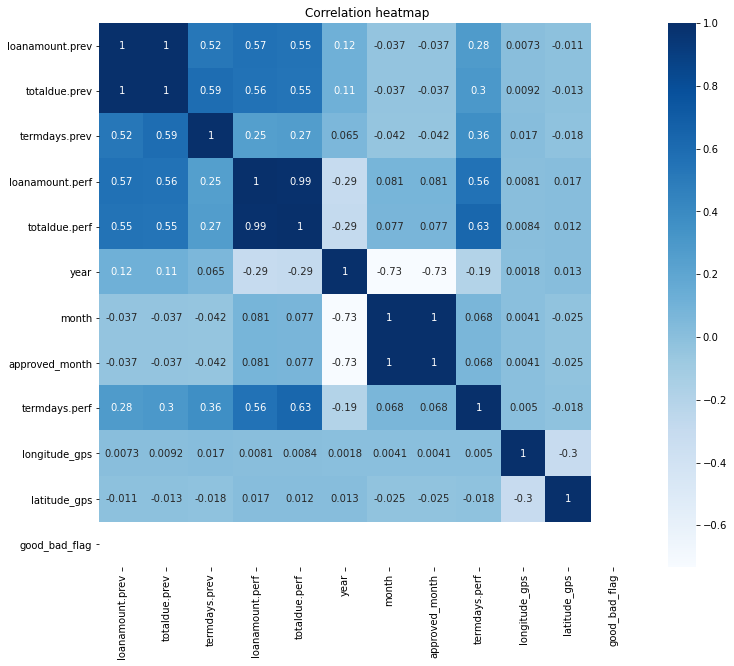

In [70]:
# Select the numerical columns and the target column
num_cols = ['loanamount.prev', 'totaldue.prev', 'termdays.prev', 'loanamount.perf', 'totaldue.perf', 
            'year', 'month', 'approved_month','termdays.perf','longitude_gps','latitude_gps','birthdate']

target_col = "good_bad_flag"

# Convert the target column to a binary numeric column
merged_data[target_col] = merged_data[target_col].map({"Good": 1, "Bad": 0})

# Calculate the Pearson's correlation coefficients
corr_matrix = merged_data[num_cols + [target_col]].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation heatmap")
plt.show()

from the heatmap above we find that columns that exibit a high correlation with the target variable;
       - `totaldue.perf`
       -  `loanamount.prev`
       -  `approved_month`
       -  `month`
       -  `loanamount.perf`
       -  `totaldue.prev`
       -  `year`
       -  `month`



    -

### Visualizing and measuring the relationship between previous and current loan amounts

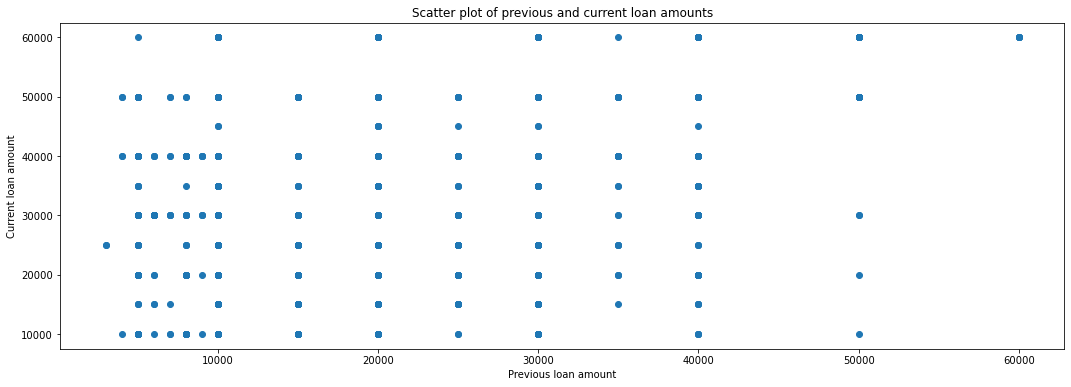

The correlation coefficient between previous and current loan amounts is 0.57


In [62]:
# Scatter plot
plt.figure(figsize=(18,6))
plt.scatter(merged_data["loanamount.prev"], merged_data["loanamount.perf"])
plt.xlabel("Previous loan amount")
plt.ylabel("Current loan amount")
plt.title("Scatter plot of previous and current loan amounts")
plt.show()

# Correlation coefficient
corr = np.corrcoef(merged_data["loanamount.prev"], merged_data["loanamount.perf"])[0,1]
print(f"The correlation coefficient between previous and current loan amounts is {corr:.2f}")

- The correlation coefficient between previous and current loan amounts is 0.57, which means that there is a moderate positive relationship between these two variables. This implies that  customers who borrowed higher amounts in the past tend to borrow higher amounts in the present, and vice versa

### Calculating and visualizing the delay in loan repayment 

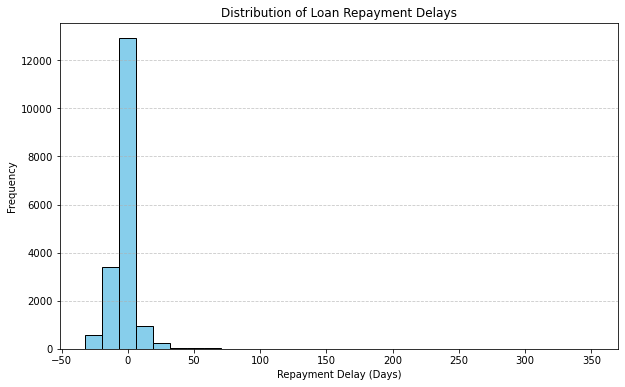

In [83]:


# Convert date columns to datetime objects
date_columns = ['firstduedate', 'firstrepaiddate']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col])

# Calculate the delay in loan repayment
merged_data['repayment_delay'] = (merged_data['firstrepaiddate'] - merged_data['firstduedate']).dt.days

# Filter out negative repayment delays (early repayments)
positive_delay = merged_data[merged_data['repayment_delay'] > 0]['repayment_delay']

# Create a histogram to visualize repayment delays
plt.figure(figsize=(10, 6))
plt.hist(merged_data['repayment_delay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Repayment Delays')
plt.xlabel('Repayment Delay (Days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


From the plotted graph we find that loans repayement most delayed days are 50 the negative shows this are the type of loans repayed early  before the due data

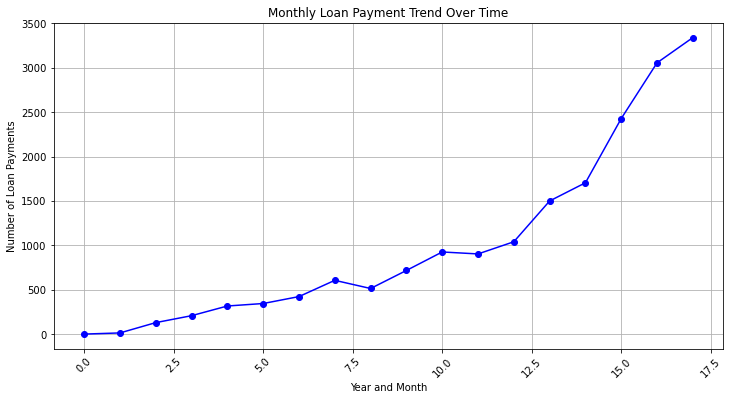

In [84]:
# Convert date columns to datetime objects
date_columns = ['firstduedate', 'firstrepaiddate']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col])

# Extract year and month from 'firstrepaiddate'
merged_data['year'] =merged_data['firstrepaiddate'].dt.year
merged_data['month'] = merged_data['firstrepaiddate'].dt.month

# Group data by year and month and count the number of loan payments
monthly_payment_counts = merged_data.groupby(['year', 'month'])['firstrepaiddate'].count().reset_index()

# Create a time series line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_payment_counts['firstrepaiddate'], marker='o', linestyle='-', color='b')
plt.title('Monthly Loan Payment Trend Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Loan Payments')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()








from the graph we conclude that their is an increase in trend in monthly loan repayment overtime most loans are bieng repayed over the course of the month

#### Creating a contingency table of employment status and loan repayment status

In [50]:
cross_tab = pd.crosstab(merged_data['employment_status_clients'], merged_data['good_bad_flag'])
print(cross_tab)


good_bad_flag               Bad  Good
employment_status_clients            
Contract                      0    10
Permanent                  1646  7472
Retired                       0    29
Self-Employed               347  1972
Student                     140   475
Unemployed                   40   179


<Figure size 1080x720 with 0 Axes>

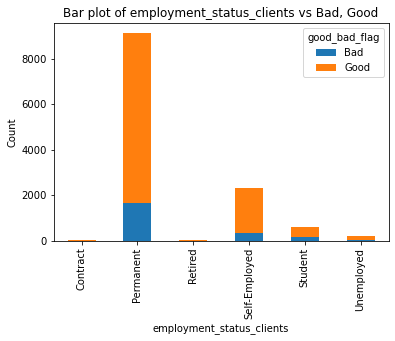

In [46]:

def plot_crosstab(crosstab):
    # Create a bar plot
    plt.figure(figsize=(15, 10))
    crosstab.plot(kind='bar', stacked=True)

    # Add labels and title
    plt.xlabel(crosstab.index.name)
    plt.ylabel('Count')
    plt.title('Bar plot of ' + crosstab.index.name + ' vs ' + ', '.join(crosstab.columns))

    # Show the plot
    plt.show()

# merged_data  as the dataframe 
cross_tab = pd.crosstab(merged_data['employment_status_clients'], merged_data['good_bad_flag'])
plot_crosstab(cross_tab)


- From the above analysis we found that it customers who are retired or under contract have the highest loan repayment rates, while students have the lowest. 

In [52]:
# Calculate the mean loan amount and term days for each group
mean_loan_amount = merged_data.groupby("good_bad_flag")["loanamount.perf"].mean()
mean_term_days = merged_data.groupby("good_bad_flag")["termdays.perf"].mean()

# Print the results
print("Mean loan amount by loan performance:")
print(mean_loan_amount)
print("Mean term days by loan performance:")
print(mean_term_days)

# Create a cross-tabulation table for employment status and loan performance
ct_employment = pd.crosstab(merged_data["employment_status_clients"], merged_data["good_bad_flag"])

# Print the results
print("Cross-tabulation of employment status and loan performance:")
print(ct_employment)

# Create a cross-tabulation table for level of education and loan performance
ct_education = pd.crosstab(merged_data["level_of_education_clients"], merged_data["good_bad_flag"])

# Print the results
print("Cross-tabulation of level of education and loan performance:")
print(ct_education)

Mean loan amount by loan performance:
good_bad_flag
Bad     22790.973872
Good    26316.571043
Name: loanamount.perf, dtype: float64
Mean term days by loan performance:
good_bad_flag
Bad     33.852435
Good    33.228822
Name: termdays.perf, dtype: float64
Cross-tabulation of employment status and loan performance:
good_bad_flag               Bad  Good
employment_status_clients            
Contract                      0    10
Permanent                  1646  7472
Retired                       0    29
Self-Employed               347  1972
Student                     140   475
Unemployed                   40   179
Cross-tabulation of level of education and loan performance:
good_bad_flag               Bad  Good
level_of_education_clients           
Graduate                    415  2093
Post-Graduate                89   346
Primary                       1    35
Secondary                   120   365


from the above analysis we found out that;
   - The majority of the customers are permanent employees, followed by self-employed, students, unemployed, retired and contract workers. The proportion   of good customers is higher than bad customers in every employment category, except for contract workers, who have no bad customers at all. This indicates that employment status is an important factor for loan performance.
   - Customers who have good loan performance tend to borrow more money than those who have bad loan performance. The mean loan amount for good customers is 26316.57 while the mean loan amount for bad customers is 22790.97. This suggests that good customers have higher income or creditworthiness than bad customers
   - The level of education of the customers is mostly graduate, followed by secondary, post-graduate and primary. The proportion of good customers is higher than bad customers in every education level, except for primary, who have only one bad customer and 35 good customers. This suggests that level of education is also a relevant factor for loan performance
   - The mean term days for both groups are similar, around 33 days. This means that the duration of the loan does not have a significant impact on the loan performance.